EAE3709 APLICACIONES DE  MACHINE LEARNING EN ECONOMÍA <br>
1ER SEMESTRE 2025 <br>
INSTITUTO DE ECONOMÍA <br>
PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE


# **TAREA 1**


---


Profesor:
- Joaquín Pérez Lapillo

Ayudantes:

- Luis García B.
- Sebastián Hernández B.
- Oscar Herrera G.


**Complete sus datos:**

- Nombre y apellido:
  - `Josseline Yariela Canales` `jycanalesb@estudiante.uc.cl`
  - `Gabriel Eduardo Oquelí` `geoquelir@estudiante.uc.cl`
- Usuario de GitHub (opcional):  `# Completar`


## Instrucciones

- Descargue el notebook y cárguelo en su Drive.
- Todas las preguntas deben ser contestadas en su notebook.
- Para que una pregunta esté correcta el código debe correr.
- Si es necesario, realice comentarios breves en su código explicando lo que está realizando o sus resultados.
- Una vez culminada su tarea, suba su notebook al buzón de tareas de Canvas.
- La fecha y hora límite de esta tarea es el _**viernes 4 de abril a las 18:00 hrs**_.



### Distribución de puntaje


| Pregunta                        | Puntaje |
|--------------------------------|---------|
| Pregunta 1.0                   |    1    |
| Pregunta 1.1                   |    3    |
| Pregunta 1.2                   |    3    |
| Pregunta 1.3                   |    2    |
| Pregunta 1.4                   |    2    |
| Pregunta 1.5                   |    5    |
| Pregunta 1.6                   |    2    |
| Pregunta 1.7                   |    5    |
| Pregunta 1.8                   |   7    |
| Pregunta 1.9                   |   5    |
| Pregunta 1.10                  |   5    |
| Pregunta 1.11                  |   6    |
| Pregunta 1.12                  |    2    |
| Pregunta 1.13                  |    5    |
| Pregunta 1.14                  |   10    |
| Pregunta 1.15                  |    5    |
| Pregunta 1.16                  |    5    |
| Pregunta 2.0                   |    2    |
| Pregunta 2.1                   |    5    |
| Pregunta 2.2                   |    5    |
| Pregunta 2.3                   |    5    |
| Pregunta 2.4                   |    3    |
| Pregunta 2.5                   |    3    |
| Pregunta 2.6                   |    2    |
| Pregunta 2.7                   |    2    |

Total: 100 pts.


### Sobre el Bonus

- La entrega, por defecto, es a través de Canvas. Sin embargo, puede escoger voluntariamente entregar la tarea en su GitHub personal.

- Si usted realiza la entrega en GitHub antes de la **fecha y hora indicada**, entonces tendrá una bonificación de 0.3 en su nota final de tarea. Es decir, si usted obtuvo una nota de 6.5, pero entregó en su GitHub, entonces su calificación en esta tarea será de 6.8.

- Si **además** de realizar la entrega a través de GitHub, usted logra crear `branches` (ramas) y realizar un `merge` entre ramas, entonces se le bonificará con 0.5 en su nota de tarea. Es decir, si usted obtuvo una nota de 6.5, pero entregó en su GitHub e hizo el trabajo de ramas, entonces su calificación en esta tarea será de 7.0.

  - Se valora capacidad autodidacta.
  - Sólo serán considerados los archivos contenidos en su rama principal a la fecha y hora indicada.



## Exploratory data analysis (EDA)

Para esta tarea se utilizará como principal fuente de información un dataset con una serie de características económicas, demográficas y de desarrollo humano de distintos países a la fecha de 2007 (corte transversal). El dataset está disponible en el siguiente [Github](https://raw.githubusercontent.com/lfgarcia-1/EAE3709-1-2025/refs/heads/main/economic_dataset.csv).<br>

Descripción del dataset:

Variables:

*   date: Fecha en la que se actualizó la data.
*   Population, Area (sq. mi.) Pop. Density (per sq. mi.), Coastline (coast/area ratio), Net migration, Infant mortality (per 1000 births), GDP ($ per capita, Literacy (%), Phones (per 1000), Arable (%), Crops (%), Other (%), Climate, Birthrate, Deathrate, Agriculture, Industry, Service: Características del país.
*   source: fuente de los datos.
*   Region: Región (grupo de países).
*   Country: País.

### Pregunta 1.0

Importe las librerías que usará en su tarea.

In [2]:
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split #Particiona en datos de entrenamiento y prueba
# Librerías manejo de datos
import pandas as pd
import numpy as np
# Librerías para graficar
import matplotlib.pyplot as plt #graficos generales
import seaborn as sns #graficos estadisticos

# Librería que filtra warnings innecesarios
import warnings  #Usar para el proyecto
warnings.filterwarnings("ignore")

### Pregunta 1.1

Importe el dataset como un DataFrame (df) directamente desde Github (es decir, no descargue el archivo manualmente). A lo largo de la tarea este df se denominará como `df`.


In [3]:
# Cargamos el dataset desde el repositorio GitHub
url = "https://raw.githubusercontent.com/lfgarcia-1/EAE3709-1-2025/refs/heads/main/economic_dataset.csv"
df = pd.read_csv(url)

### Pregunta 1.2

Utilice las funciones de Pandas `head()`, `tail()`, `info()` y la propiedad (o atributo) `.dtypes` para describir el `df`. Explique brevemente para qué sirve cada función.

In [4]:
df.head()  # Visualizar las 5 primeras filas

,date,source,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,2007-01-01,US Goverment,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,...,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,2007-01-01,US Goverment,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,...,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,2007-01-01,US Goverment,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,...,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,2007-01-01,US Goverment,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,...,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,2007-01-01,US Goverment,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,...,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [5]:
df.tail() #Muestra las últimas filas del Dataframe.

,date,source,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
222,2007-01-01,US Goverment,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,...,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,2007-01-01,US Goverment,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,...,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,2007-01-01,US Goverment,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,...,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,2007-01-01,US Goverment,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,...,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489
226,2007-01-01,US Goverment,Zimbabwe,SUB-SAHARAN AFRICA,12236805,390580,31.3,0.00,0.00,67.69,...,26.8,8.32,0.34,91.34,2.0,28.01,21.84,0.179,0.243,0.579


In [6]:
df.info() #visualizar tipo de datos, enteros (int) son dos variables, decimales(float) 16 variables y 4 object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                227 non-null    object 
 1   source                              227 non-null    object 
 2   Country                             227 non-null    object 
 3   Region                              227 non-null    object 
 4   Population                          227 non-null    int64  
 5   Area (sq. mi.)                      227 non-null    int64  
 6   Pop. Density (per sq. mi.)          227 non-null    float64
 7   Coastline (coast/area ratio)        227 non-null    float64
 8   Net migration                       224 non-null    float64
 9   Infant mortality (per 1000 births)  224 non-null    float64
 10  GDP ($ per capita)                  226 non-null    float64
 11  Literacy (%)                        209 non-n

In [7]:
# Para revisar los tipos de datos de todas las columnas.
tipos = df.dtypes
print(tipos)

date                                   object
source                                 object
Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                           

### Pregunta 1.3

La variable `source` es innecesaria debido que contiene el mismo valor para todas las observaciones. Elimine esta variable de su `df`.

In [8]:
#Eliminar la columna de la variable source

df = df.drop('source', axis= 1) #Axis=1 indica que se elimina columna completa.

In [10]:
df.head()  #Comprobación de eliminación de 'source'

,date,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,2007-01-01,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,...,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,2007-01-01,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,...,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,2007-01-01,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,...,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,2007-01-01,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,...,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,2007-01-01,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,...,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


### Pregunta 1.4

Transforme el tipo de la variable `date` a `datetime` _datatype_.

In [15]:
# Se transforma a formato datetime, sobreescribiendo la columna. por defecto es año-mes-dia (aammdd).
df["date"] = pd.to_datetime(df["date"])

In [16]:
df.dtypes #verificación del cambio de date object a datetime64[ns]

date                                  datetime64[ns]
Country                                       object
Region                                        object
Population                                     int64
Area (sq. mi.)                                 int64
Pop. Density (per sq. mi.)                   float64
Coastline (coast/area ratio)                 float64
Net migration                                float64
Infant mortality (per 1000 births)           float64
GDP ($ per capita)                           float64
Literacy (%)                                 float64
Phones (per 1000)                            float64
Arable (%)                                   float64
Crops (%)                                    float64
Other (%)                                    float64
Climate                                      float64
Birthrate                                    float64
Deathrate                                    float64
Agriculture                                  f

In [17]:
df.head() #Comprobación adicional

,date,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,2007-01-01,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,...,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,2007-01-01,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,...,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,2007-01-01,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,...,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,2007-01-01,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,...,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,2007-01-01,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,...,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


### Pregunta 1.5

Para determinar si las variables son "útiles" y sus valores son "correctos" es necesario comprender cada uno de los atributos del dataset.
Investigue y explique brevemente la relación **teórica** entre el `GDP (% per capita)` y cada una de las variables denominadas como "Características del país" en la introducción.

Ejemplo: Existe una variable denominada `Coastline (coast/area ratio)`. Coastline es una medida de la cantidad de costa (acceso a mar) del país normalizada al área total del país para no beneficiar a países más grandes pero con la misma proporción de costa. A mayor "Costline" aumenta la capacidad portuaria per capita del país, más puertos facilita el comercio y podría aumentar el GDP per cápita.




---


*Escriba* su respuesta en esta celda...

`Population`: El efecto puede ser ambiguo, una mayor población puede significar mayor consumo, mayor capital humano, impulsando el crecimiento económico. Sin embargo si no hay suficiente generación de empleo, suficiente inversión e infraestructura para soportar la sobrepoblación puede diluir los efectos positivos, resultando en un menor `GDP (% per capita`.

`Area (sq. mi.) `: El tamaño geográfico de un país no tiene una relación directa con el `GDP (% per capita`. Aunque los países más grandes pueden tener más recursos naturales o mercados más grandes, estas ventajas no se traducen siempre en un mayor PIB per cápita, como se observa en diversos ejemplos a nivel mundial (Rusia).

`Pop. Density (per sq. mi.)`: Una alta densidad poblacional a menudo se asocia con mejor acceso a servicios, infraestructuras y mercados, lo que puede incrementar la productividad y así contribuir a un mayor `GDP (% per capita`. Esta relación es especialmente notoria en áreas urbanas de países desarrollados. En países en vías de desarrollo no es igual.

`Net migration`: Un país con migración neta positiva suele ser más atractivo por sus oportunidades económicas, lo que prácticamente se asocia con un mayor PIB per cápita. Sin embargo, la migración excesiva puede presionar los servicios públicos pero por otro lado implica mayor fuerza laboral y esto puede fomentar el crecimiento económico.

`Infant mortality (per 1000 births)`: Una alta mortalidad infantil suele reflejar condiciones precarias en salud y servicios públicos, lo que está asociado a bajos niveles de desarrollo y por tanto bajo PIB per cápita.

`Alfabetización (%)`: Relación positiva entre alfabetización y PIB per cápita. La educación mejora la productividad de la población y promueve el desarrollo económico en un país.

` Phones (per 1000)`: Tiene relación positiva  con el `GDP (% per capita`. Representa mayor acceso tecnológico, mayor infraestructura de comunicación en un país, lo cual mejora la eficiencia económica y por ende el desarrollo.

`Arable (%) `: Tener alto porcentaje de tierra cultivable, puede ser ventajoso para países agrícolas, pero no necesariamente implica mayor PIB per cápita si la economía no está diversificada o si la productividad es baja.

`Crops (%)`: Es similar a tener alto porcentaje de tierra cultivable, dependerá de la eficiencia y el valor agregado que tengan dichos nichos agrícolas. Muchas veces las economías agrícolas están menos industrializadas, además la tierra tiende a estar en pocas manos (riqueza concentrada), por tanto se asocia a un menor `GDP (% per capita`.

`Climate`: El clima afecta el desarrollo económico a través de la agricultura, la salud y la productividad. “Los climas tropicales pueden enfrentar mayores cargas de enfermedades, como la malaria, mientras que los climas templados, como en Europa Occidental, suelen apoyar actividades agrícolas diversas y tienen menores costos de salud, influyendo positivamente en el PIB per cápita.” Este impacto varía según el tipo de clima, y estudios como los de Jeffrey Sachs ( Clima y Desarrollo ) destacan estas diferencias.

`Natalidad`: Relación negativa con el `GDP (% per capita`. Altas tasas de mortalidad suelen estar relacionadas con menor desarrollo económico ya que implican mayores gastos para el fisco, en términos educativos y de salud, lo que puede reducir el PIB per cápita en el corto y mediano plazo
`Tasa de mortalidad`: Similar a la variable de `Natalidad`. Altas tasas de mortalidad indican baja esperanza de vida y peor acceso a salud, esto se relaciona con un bajo `GDP (% per capita`.

`Agriculture`: Un alto porcentaje de agricultura puede indicar que la economía está poco diversificada ya que tiene dependencia de la agricultura, esto se da mucho en economías que están en vías de desarrollo, por lo que suele estar negativamente correlacionada con el `GDP (% per capita`.

`Industry`: Un mayor peso de la industria puede indicar un proceso de industrialización que favorece el crecimiento económico, en este sentido suele haber una relación positiva con el PIB per cápita.

`Service`: Las economías más desarrolladas tienden a tener un sector de servicios más grande. Las economías más desarrolladas tienden a tener un sector de servicios más grande (finanzas, tecnología, educación, salud), por lo que se espera una fuerte relación positiva con el PIB per cápita.

---



In [18]:
df.info() #visualizar tipo de datos, enteros, decimales o strings.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   date                                227 non-null    datetime64[ns]
 1   Country                             227 non-null    object        
 2   Region                              227 non-null    object        
 3   Population                          227 non-null    int64         
 4   Area (sq. mi.)                      227 non-null    int64         
 5   Pop. Density (per sq. mi.)          227 non-null    float64       
 6   Coastline (coast/area ratio)        227 non-null    float64       
 7   Net migration                       224 non-null    float64       
 8   Infant mortality (per 1000 births)  224 non-null    float64       
 9   GDP ($ per capita)                  226 non-null    float64       
 10  Literacy (%)              

### Pregunta 1.6

Calcule estadísticas descriptivas para cada variable numérica.

In [20]:
# describe() entrega estadísticas descriptivas para variables numéricas.
stats_descriptivas = df.describe()
print(stats_descriptivas)

#Algunos resultados: La media de la variable Población es de aproximadamente 28.7 millones de personas. En cuanto al Área por Milla Cuadrada tiene un promedio de 598,227,000 millas. La Densidad Poblacional: Presenta un Promedio de 379.04 por milla cuadrada, con un máximo de 16,271.5. y asi sucesivamente.

                      date    Population  Area (sq. mi.)  \
count                  227  2.270000e+02    2.270000e+02   
mean   2007-01-01 00:00:00  2.874028e+07    5.982270e+05   
min    2007-01-01 00:00:00  7.026000e+03    2.000000e+00   
25%    2007-01-01 00:00:00  4.376240e+05    4.647500e+03   
50%    2007-01-01 00:00:00  4.786994e+06    8.660000e+04   
75%    2007-01-01 00:00:00  1.749777e+07    4.418110e+05   
max    2007-01-01 00:00:00  1.313974e+09    1.707520e+07   
std                    NaN  1.178913e+08    1.790282e+06   

       Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
count                  227.000000                    227.000000   
mean                   379.047137                     21.165330   
min                      0.000000                      0.000000   
25%                     29.150000                      0.100000   
50%                     78.800000                      0.730000   
75%                    190.150000                     10.

### Pregunta 1.7

Según corresponda, realice un gráfico de distribución de densidad o histograma para describir 3 variables del `df` que usted crea más relevantes.

¿Por qué es importante analizar las distribuciones de las variables a utilizar en su modelo? Ejemplifique su respuesta con al menos una de las variables del df`.

<Axes: xlabel='GDP ($ per capita)', ylabel='Density'>

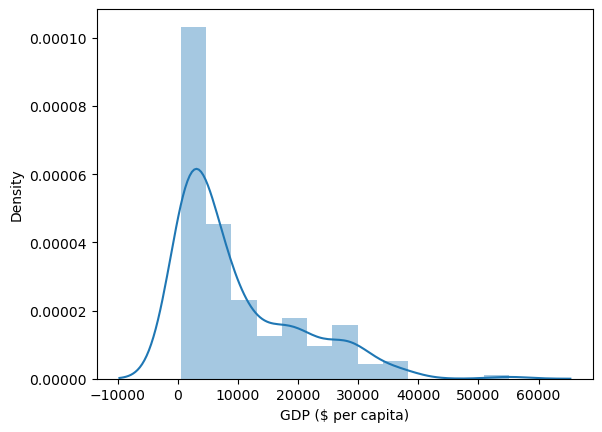

In [28]:
# Distribución de densidad: Para Variable de ínteres: GDP ($ per capita).

sns.distplot(df['GDP ($ per capita)']) #Muestra una concentración a la  izquierda

<Axes: xlabel='Literacy (%)', ylabel='Density'>

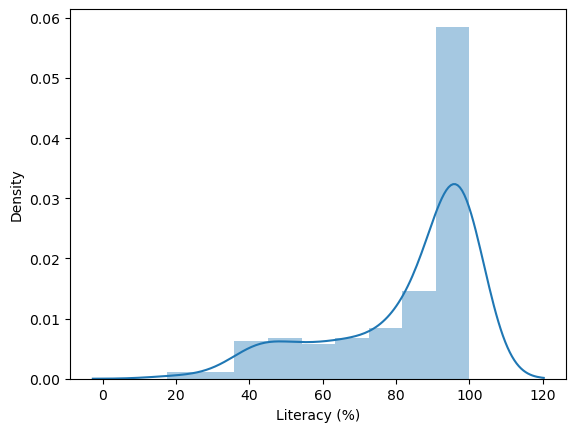

In [ ]:
# 1) Distribución de densidad: Para Variable Alfabetización, Se considera relevante porque tiene un impacto significativo en el GDP (%) de un país por varias razones: Altas tasas de alfabetización  resulta en trabajadores más capacitados y productivos, ademas tienden a tener mejores oportunidades laborales, lo que aumenta sus ingresos y por tanto contribuyen al crecimiento economico.
sns.distplot(df['Literacy (%)'])
#Presenta una distribución asimetrica, es decir no distribuye normal. En ML es importante la distribución normal ya que los modelos funcionan mucho mejor.
#En el gráfico se observa que la mayoría de los países tienen altos niveles de alfabetización (entre 80% y 100%). En la cola izquierda hay algunos paises con alfabetizacion muy baja. También se observa valores outliers, por arriba de 100%, lo cual no es posible, puede que sea un error de digitación.

La variable `Alfabetización (%)` no sigue una distribución normal y esto puede reducir el desempeño de algunos modelos de regresión. Por lo que se realizará una transformación logarítmica.

<Axes: xlabel='Literacy_Log', ylabel='Density'>

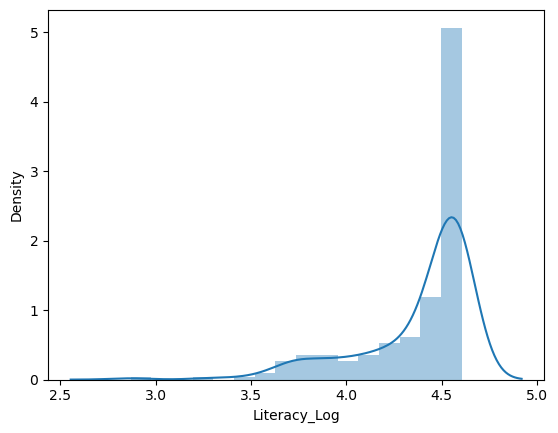

In [30]:
np.log(df['Literacy (%)'])  # Utilizamos función log de la librería numpy.
df['Literacy_Log'] = np.log(df['Literacy (%)'])  # Creamos una nueva columna con la transformación
sns.distplot(df['Literacy_Log'])

<Axes: xlabel='Industry', ylabel='Density'>

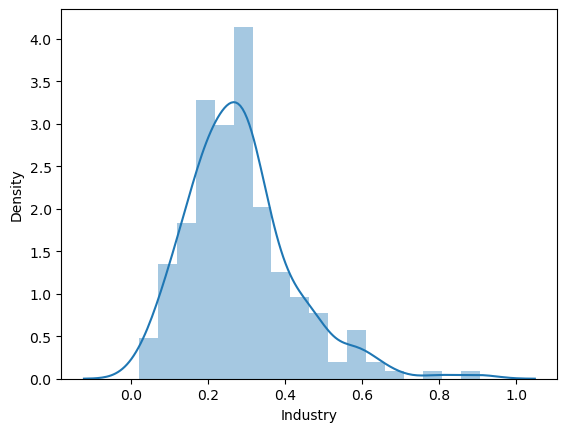

In [32]:
# 2) Distribución de densidad: Para Variable: Industria
sns.distplot(df['Industry']) # Se observa una distribucion con una leve concetracion a la izquierda. Reescalaremos en logaritmo

La gráfica de densidad para la `Industry` muestra una concentración leve hacia la izquierda , lo que indica que la mayoría de los valores de la variable Industria están agrupados en valores pequeños. Esto podría sugerir que, en la mayoría de los países analizados, el sector industrial no es dominante, y que la mayoría de paises estan basadas en agricultura u otra rama de actividad económica.

<Axes: xlabel='Service', ylabel='Density'>

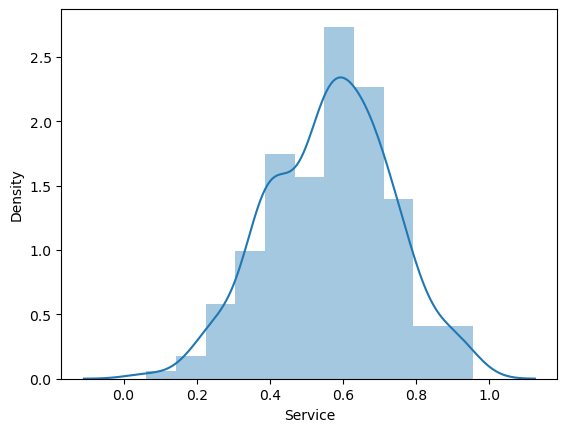

In [33]:
# Distribución de densidad: Para Variable: Servicios
sns.distplot(df['Service'])




---


Lo imporante de estas variables vista de una perspectiva economica como por ejemplo el modelo de Solow, que menciona que el crecimiento del PIB per cápita depende del `capital físico`, el `capital humano` y el `progreso tecnológico`. La ,`alfabetización` incrementa el capital humano y mejora la productividad laboral. La `industria` impulsa la acumulación de capital y la adopción tecnológica, mientras que el `sector servicios`, característico de economías avanzadas, aporta valor agregado y refleja altos niveles de desarrollo. Estas tres variables están positivamente relacionadas con el crecimiento económico sostenido, y esto lo podemos observar en los graficos donde los paises con mayor riqueza se generan esta mayor concentracion de dichas caracteristicas en los graficos.


---



### Pregunta 1.8

El df contiene variables con missing values (`NaN`). Impute los `NaN` con el método que estime conveniente, justificando su decisión.

¿Es pertinente eliminar alguna de estas variables? Hágalo si es el caso.

In [34]:
# Pimero Analizamos el numero de valores missing que hay por cada columna y que porcentaje representa de la muestra total
# Cantidad y porcentaje de missing por variable
missing_conteo = df.isnull().sum().to_frame(name='Valores Nulos') # Se calcula la cantidad de valores nulos por cada columna y lo guarda en un nuevo dataFrame
missing_conteo['% Valores Nulos'] = (missing_conteo['Valores Nulos'] / len(df)) * 100 # Agregamos una nueva columna con el porcentaje de valores nulos respecto al total de filas y len(df) entrega el número total de filas u observaciones
missing_conteo= missing_conteo[missing_conteo['Valores Nulos'] > 0].sort_values(by='% Valores Nulos', ascending=False) # Se filtra solo las columnas que tienen al menos un valor nulo
print(missing_conteo)

                                    Valores Nulos  % Valores Nulos
Climate                                        22         9.691630
Literacy (%)                                   18         7.929515
Literacy_Log                                   18         7.929515
Industry                                       16         7.048458
Agriculture                                    15         6.607930
Service                                        15         6.607930
Phones (per 1000)                               4         1.762115
Deathrate                                       4         1.762115
Net migration                                   3         1.321586
Infant mortality (per 1000 births)              3         1.321586
Birthrate                                       3         1.321586
Arable (%)                                      2         0.881057
Crops (%)                                       2         0.881057
Other (%)                                       2         0.88

In [35]:
df_imputado = df.copy() #Por seguridad creamos una copia del df original para no modificarlo directamente
# Imputamos sobre columnas numéricas del df
# Usamos apply por fila para rellenar los valores nulo con la mediana de su región
for col in df_imputado.select_dtypes(include='number').columns:
     df_imputado[col] = df_imputado.apply(
        lambda row: df_imputado[df_imputado['Region'] == row['Region']][col].median() #Se busca rellenar  la informacion segun la media de la region a donde pertence el pais que tiene ese valor nulo
        if pd.isna(row[col]) else row[col],
        axis=1
    )
print(df_imputado.isna().sum())

date                                  0
Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
Literacy_Log                          0
dtype: int64


In [38]:
# Reemplazamos el df original con el imputado
df = df_imputado.copy()




---


Se identificó la presencia de valores nulos en algunas variables; sin embargo, en ningún caso estos superan el 10% del total de observaciones, tal como se detalló en el análisis de la celda anterior. Por esta razón, no se optó por eliminar dichas variables. Para abordar la imputación de los datos faltantes, se decidió utilizar la mediana (median) en el caso de las variables numéricas, dado que esta medida es robusta frente a valores atípicos. Además, la imputación se realizó por región, con el fin de asignar a los países con datos faltantes un valor más representativo de su contexto geográfico.


---


### Pregunta 1.9

¿Cómo distribuye el `GDP ($ per capita)` en diferentes **regiones**? Defina una forma ilustrativa de gráficar el `GDP ($ per capita)` para todas las regiones en un mismo gráfico. Interprételo.




---


*Escriba* su interpretación en esta celda...


---


### Pregunta 1.10

Supongamos que `GDP ($ per capita)` es su variable objetivo. Estudie la correlación de esta variable con el resto de las variables del `df`. ¿Por qué es importante analizar la correlación entre las variables?




---


*Escriba* su respuesta en esta celda...


---


### Pregunta 1.11

Realice tres _scatterplots_ (uno por variable) de las tres variables con la mayor correlación con la variable objetivo.

Utilizando los parámetros de la función con la que hizo los _scatterplots_, coloque un título a cada gráfico y agregue colores a los _data points_ del _scatterplot_- Use colores diferentes por cada gráfico.

### Pregunta 1.12

Cree una nueva columna `GDP (%)` que represente el GDP total de cada pais (no per capita) y agreguela al dataframe.

### Pregunta 1.13

Repita el análisis de correlaciones para `GDP ($)` excluyendo `GDP ($ per capita)` del análisis. ¿Cambian las variables que más correlacionan? Justifique.




---


*Escriba* su **justificación** en esta celda...


---


### Pregunta 1.14

Detecte las observaciones outliers de las tres variables seleccionadas en la pregunta anterior. Además, impute estas observaciones si usted lo considera necesario. Justifique su decisión.




---


*Escriba* su **justificación** en esta celda...


---



### Pregunta 1.15

En los ejemplos anteriores calculamos correlaciones para `GDP ($ per capita)` y `GDP ($)`. Genere un nuevo dataframe que tenga le variación porcentual de la correlación absoluta para cada una de las columnas de características, e.g., si la correlación en valor absoluto de `GDP ($ per capita)` vs `Industry` es 0.1 y la correlación `GDP ($)` vs `Industry` es 0.5, la variación deberá ser +500%. Dicha variación porcentual puede ser positiva o negativa, pero ordene los el dataframe de tal manera que la variación de correlación absoluta sea desendiente.

### Pregunta 1.16

Del resultado anterior, ¿qué caracerística del país tuvo una mayor diferencia absoluta el medir su correlación versus `GDP ($)` en vez de `GDP ($ per capita)`'. Interprete.




---


*Escriba* su respuesta e interpretación en esta celda...

---





## EDA con diferentes fuentes de **información**


Una situación habitual en _Data Science: es el manejo de información de múltiples fuentes para un mismo propósito. En este sentido, de ahora en adelante agregaremos un dataframe adicional a nuestro set de información, disponible en [Github](https://raw.githubusercontent.com/datasets/gini-index/refs/heads/main/data/gini-index.csv). Lo llamaremos `df_gini`.

Este dataset contiene información histórica del Índice de Gini (economía), el cual captura la desigualdad económica entre los quintiles de cada país. A mayor índice Gini, más desigual es un país en términos de ingresos. Para mayor información sobre los datos, puede dirigirse al [Repositorio](https://github.com/datasets/gini-index) completo. Para conocer más sobre el índice, una navegación por [Wikipedia](https://en.wikipedia.org/wiki/Gini_coefficient) debería ser suficiente.

### Pregunta 2.0

Cargue la base datos, asegúrese de que la variable de año esté en un formato de "fecha", y usando el diccionario de mapeo por inconsistencias de nombres, `country_name_mapping`, encuentre la forma de realizar un INNER JOIN entre ambas tablas, usando el nombre del país y el año de la observación como variables por las cuales hacer el JOIN. En el diccionario `country_name_mapping`, _keys_ corresponden a los valores de la tabla `df_gini` y _values_ a los de `df`.

Llame al dataframe resultante `df_merged`.

Si usted no se ha percatado, los nombres en la columna `Country` de `df` poseen espacios al final de estos. Elimine los espacios antes de realizar el INNER JOIN de interés (Hint: existe una función propia de las variables tipo `string` que realiza la labor de eliminar espacios al final de la palabra).



In [ ]:
# NO MODIFICAR, pero sí ejecutar
country_name_mapping = {
    "Bahamas": "Bahamas, The",
    "Bosnia and Herzegovina": "Bosnia & Herzegovina",
    "Myanmar": "Burma",
    "Cape Verde": "Cabo Verde",
    "Central African Republic": "Central African Rep.",
    "Congo, Rep.": "Congo, Repub. of the",
    "Czechia": "Czech Republic",
    "Timor-Leste": "East Timor",
    "Egypt, Arab Rep.": "Egypt",
    "West Bank and Gaza": "Gaza Strip",
    "Iran, Islamic Rep.": "Iran",
    "Korea, Dem. People's Rep.": "Korea, North",
    "Korea, Rep.": "Korea, South",
    "Kyrgyz Republic": "Kyrgyzstan",
    "Lao PDR": "Laos",
    "North Macedonia": "Macedonia",
    "Micronesia, Fed. Sts.": "Micronesia, Fed. St.",
    "Russian Federation": "Russia",
    "St. Kitts and Nevis": "Saint Kitts & Nevis",
    "St. Lucia": "Saint Lucia",
    "St. Vincent and the Grenadines": "Saint Vincent and the Grenadines",
    "Slovak Republic": "Slovakia",
    "Eswatini": "Swaziland",
    "Syrian Arab Republic": "Syria",
    "Trinidad and Tobago": "Trinidad & Tobago",
    "Turkiye": "Turkey",
    "Venezuela, RB": "Venezuela",
    "Viet Nam": "Vietnam",
    "Yemen, Rep.": "Yemen"
}



### Pregunta 2.1

Repita el ejercicio de la obtención de un ranking para las correlaciones absolutas, tal como lo hizo para el GDP per cápita. ¿Cuáles son las relaciones que más le sorprenden? ¿Cuáles son las que están en línea con lo que esperaba? Justifique para ambos casos.







---


*Escriba* su respuesta y justificación en esta celda...

---





Finalmente, agregaremos una tercera base de datos al análisis, también disponible en [Github](https://raw.githubusercontent.com/datasets/co2-fossil-by-nation/refs/heads/main/data/fossil-fuel-co2-emissions-by-nation.csv) con su repectivo
[Repositorio](https://github.com/datasets/co2-fossil-by-nation). Esta contiene emisiones de dióxido de carbono (CO2) total y por fuentes, desagregado por país. La base de datos contiene datos desde el siglo XVI y la frecuencia es anual.



### Pregunta 2.2

Cargue la base de datos llamándola `df_co2`. Asegúrese de que todas las variables estén en su correcto formato (años deben estar en un formato de fecha). ¿Qué cuidados identifica usted que debiésemos tener al momento de observar valores nulos en esta base de datos?

Adicionalmente, para cada palabra en la columna `Country`, asegúrese de que la primera letra siempre sea mayúscula y que el resto de letras sean minúsculas (Hint: revise `methods` propios de las variables tipo `string`).

Luego, reemplace valores en `df_co2["Country"]` según el mapping otorgado. En el diccionario `country_name_mapping_co2`, _keys_ corresponden a los valores de la tabla `df_co2` y _values_ a los de `df`.




In [ ]:
# NO MODIFICAR, pero sí ejecutar
country_name_mapping_co2 = {
    "United States Of America": "United States",
    "France (Including Monaco)": "France",
    "Italy (Including San Marino)": "Italy",
    "Plurinational State Of Bolivia": "Bolivia",
    "Federal Republic Of Germany": "Germany",
    "Former German Democratic Republic": "Germany",
    "Republic Of Moldova": "Moldova",
    "United Republic Of Tanzania": "Tanzania",
    "Japan (Excluding The Ruyuku Islands)": "Japan",
    "Hong Kong Special Adminstrative Region Of China": "Hong Kong",
    "Peninsular Malaysia": "Malaysia",
    "Democratic Republic Of The Congo (Formerly Zaire)": "Congo, Dem. Rep.",
    "Brunei (Darussalam)": "Brunei",
    "Myanmar (Formerly Burma)": "Burma",
    "Syrian Arab Republic": "Syria",
    "Islamic Republic Of Iran": "Iran",
    "Republic Of Korea": "Korea, South",
    "Democratic People S Republic Of Korea": "Korea, North",
    "Russian Federation": "Russia",
    "Viet Nam": "Vietnam",
    "Yemen": "Yemen, Rep.",
    "Trinidad And Tobago": "Trinidad & Tobago",
    "Bahamas": "Bahamas, The",
    "Micronesia": "Micronesia, Fed. St.",
    "Slovakia": "Slovakia",
    "St. Vincent & The Grenadines": "Saint Vincent and the Grenadines",
    "Saint Lucia": "Saint Lucia",
    "Antigua & Barbuda": "Antigua & Barbuda",
    "Saint Kitts-Nevis-Anguilla": "Saint Kitts & Nevis",
    "Netherland Antilles And Aruba": "Netherlands Antilles",
    "Timor-Leste (Formerly East Timor)": "East Timor",
    "Macau Special Adminstrative Region Of China": "Macau",
    "Republic Of Cameroon": "Cameroon",
    "Republic Of Sudan": "Sudan",
    "Lao People S Democratic Republic": "Laos",
    "Libyan Arab Jamahiriyah": "Libya",
    "Cote D Ivoire": "Cote d'Ivoire",
    "British Virgin Islands": "British Virgin Is.",
    "Faeroe Islands": "Faroe Islands",
    "China (Mainland)": "China",
}




---


*Escriba* su respuesta y justificación en esta celda...

---



### Pregunta 2.3

En un mismo gráfico, grafique las series de emisiones totales de CO2 para los siguientes países:

- Reino Unido
- Canadá
- Alemania
- Francia
- Estados Unidos
- Brasil
- China
- Japón
- India


Para cada serie, añada una leyenda con el nombre del país.


### Pregunta 2.4

Para el año 2007, por cada país realice un ranking de las fuentes con más emisiones de CO2 excluyendo las variables `Per Capita` y `Bunker fuels (Not in Total)`. Es decir, asigne un número de 1 a 5 a $\{$ `Solid Fuel`, `Liquid Fuel`, `Gas Fuel`, `Cement`, `Gas Flaring` $\}$, donde 1 es la mayor fuente de emisión de ese país en aquel año, y 5 indica que fue la menor; así para todos los países.

Si en 2007 no se reporta una fuente de emisión para un país, por ejemplo, si emisiones de `Gas Flaring` no se reportara, entonces asigne números de 1 a 4 a las fuentes restantes. Análogo para un menor número de datos.

Luego, por cada variable grafique un histograma de frecuencias del ranking que obtuvo la fuente emisión a lo largo de todos los países.

¿Cuál fue la fuente más contaminante en la mayoría de países en 2007?




---


*Escriba* su respuesta y justificación en esta celda...

---





### Pregunta 2.5

Para cada serie de total de emisiones por país, calcule el cambio porcentual a través del tiempo. Realice imputación de missings si considera necesario, justificando su imputación. Si no lo considera necesario, también justifique (se evaluará un buen criterio fundamentado).

Repita el ejercicio del gráfico de series de tiempo anterior, pero graficando los **cambios porcentuales** para años mayores o iguales a 1995. ¿Cómo interpretaría económicamente el shock sobre las emisiones de CO2 tanto en la crisis subprime como en la crisis del Covid-19?



---


*Escriba* su justificación e interpretación en esta celda...



---





### Pregunta 2.6

Calcule el promedio a lo largo de toda la muestra ($\mathbb{E}[\cdot]$) para el cambio porcentual de cada país y genere una nueva serie con la resta entre el cambio porcentual del país $i$ en el año $t$, y el promedio del cambio porcentual del país $i$. En otras palabras, genere una serie con _**desvíos del cambio porcentual promedio**_ $\forall i,t$:

$$Nueva Serie_i = \Delta \% TotalCO2_{i,t} - \mathbb{E}[{\Delta \% TotalCO2_{i,t}}]$$

Luego, para los siguientes países:

- Reino Unido
- Canadá
- Alemania
- Francia
- Estados Unidos
- Japón
- Italia
- España


grafique en un panel _1x2_ la desviación del cambio porcentual respecto al promedio entre 2007 y 2010 en lado izquierdo, y entre 2017 y 2020 en el lado derecho (Hint: Hay comandos que facilitan esta labor. Puede intentar con `fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)`, por ejemplo).

¿Existe algún país en particular que mostró mayores desviaciones atípicas de emisión de CO2 durante el periodo de la crisis sub-prime? ¿Cómo es el comportamiento de las desviaciones atípicas de CO2 de este país durante la crisis del Covid-19?


---


*Escriba* su respuesta en esta celda...



---





### Pregunta 2.7

Genere un nuevo dataframe llamado `df_final`. Para esto, realice un INNER JOIN entre el dataframe `df_co2` y `df_merged` por "año y país" (debería terminar sólo con valores de 2007 si usted realiza un INNER JOIN).

Finalmente, grafique un mapa de calor de correlaciones (_heatmapt_) entre las variables numéricas ,excluyendo fechas.

¿Qué variables económicas, demográficas y de desarrollo humano muestran relación más importante con las emisiones de CO2? Interprete estas relaciones.


---


*Escriba* su respuesta e interpretación en esta celda...



---
